# Assignment 4

test if the distribution of 

1) trip duration of bikers that ride during the day vs night

are different. Use 3 tests: KS, Pearson's, Spearman's. 

Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 

For the KS do the test with the entire dataset and with a subset 200 times smaller

Choose a single significant threshold for the whole exercise. 

For each test phrase the Null Hypothesis in words.

Describe the return of the scipy function you use in each case.

State the result in terms of rejection of the Null.

In [295]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
import datetime as dt
%pylab inline
import scipy.stats
import os
from scipy import stats
#this makes my plots pretty! but it is totally not mandatory to do it
import json


Populating the interactive namespace from numpy and matplotlib


In [110]:
puidata = os.getenv("PUIDATA")
if not puidata or puidata == '/nfshome/sjs909/PUIdata':
    puidata = '/nfshome/sjs909/PUIDATA'

os.environ["PUIDATA"] = puidata
os.environ["PUIDATA"]

'/nfshome/sjs909/PUIDATA'

In [111]:
# Read in the Data

In [112]:
#read in the data from fall season and winter season
jan18 = pd.read_csv("%s/JC-201801-citibike-tripdata.csv.zip"%os.getenv("PUIDATA"))
sep18 = pd.read_csv("%s/JC-201809-citibike-tripdata.csv.zip"%os.getenv("PUIDATA"))


Concatenate the two datasets together

In [113]:
df = pd.concat([jan18,sep18],axis=0)

In [114]:
df.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
39017,985,2018-09-29 09:02:31.3090,2018-09-29 09:18:56.6570,3694,Jackson Square,40.71113,-74.0789,3211,Newark Ave,40.721525,-74.046305,29492,Subscriber,1991,2
39018,1595,2018-09-30 09:36:44.8650,2018-09-30 10:03:19.9750,3694,Jackson Square,40.71113,-74.0789,3183,Exchange Place,40.716247,-74.033459,29252,Subscriber,1987,1
39019,1996,2018-09-30 11:15:46.8100,2018-09-30 11:49:03.1200,3694,Jackson Square,40.71113,-74.0789,3186,Grove St PATH,40.719586,-74.043117,29122,Customer,1987,2
39020,1803,2018-09-30 11:16:37.0760,2018-09-30 11:46:40.6460,3694,Jackson Square,40.71113,-74.0789,3273,Manila & 1st,40.721651,-74.042884,29251,Customer,1974,1
39021,779,2018-09-30 13:49:47.3930,2018-09-30 14:02:46.7200,3694,Jackson Square,40.71113,-74.0789,3192,Liberty Light Rail,40.711242,-74.055701,29653,Customer,1969,0


In [115]:
df['date'] = pd.to_datetime(df['starttime'])

In [116]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,932,2018-01-01 02:06:17.5410,2018-01-01 02:21:50.0270,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31929,Subscriber,1992,1,2018-01-01 02:06:17.541
1,550,2018-01-01 12:06:18.0390,2018-01-01 12:15:28.4430,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31845,Subscriber,1969,2,2018-01-01 12:06:18.039
2,510,2018-01-01 12:06:56.9780,2018-01-01 12:15:27.8100,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31708,Subscriber,1946,1,2018-01-01 12:06:56.978
3,354,2018-01-01 14:53:10.1860,2018-01-01 14:59:05.0960,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,31697,Subscriber,1994,1,2018-01-01 14:53:10.186
4,250,2018-01-01 17:34:30.1920,2018-01-01 17:38:40.9840,3183,Exchange Place,40.716247,-74.033459,3639,Harborside,40.719252,-74.034234,31861,Subscriber,1991,1,2018-01-01 17:34:30.192


In [117]:
df['Time'] = [datetime.datetime.time(d) for d in df['date']]

In [118]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date', 'Time'],
      dtype='object')

# Split By Category

Looking at the trip duration of bikers that ride during the day vs night.

H0: there is no statistical difference in the trip duration of day and night riders for the combined months of january and september.<br>

Ha: There is a statistical difference in the trip duration of day and night riders for the combined months of january and september.

$\alpha = 0.05 $

In [194]:
# Drop columns we don't need
df_dayNight = df[['Time','tripduration']]

Lets define night as 6:01 PM until 11:59 PM and day as 12:00 AM to 6:00 PM and split the data accordingly
        

In [257]:
Daypeep = df_dayNight.loc[df_dayNight['Time'].between(datetime.time(0),datetime.time(18),inclusive = True)]
Daypeep['Split'] =  'Day'

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [255]:
Nightpeep = df_dayNight.loc[df_dayNight['Time'].between(datetime.time(18,1),datetime.time(23,59),inclusive = True)]

In [256]:
Nightpeep['Split'] =  'Night'

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [258]:
DayNightSplit = pd.concat([Daypeep,Nightpeep],axis=0)

In [288]:
DayNightSplit = DayNightSplit.sort_values(by=['tripduration'])

Text(0.5,1,'Distribution of Trip Duration between Day & Night Riders')

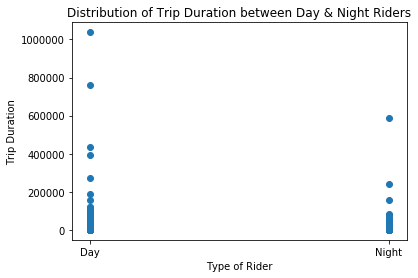

In [287]:
plt.scatter(DayNightSplit['Split'],DayNightSplit['tripduration'])
plt.xlabel('Type of Rider')
plt.ylabel('Trip Duration')
plt.title('Distribution of Trip Duration between Day & Night Riders')

Fig 1. Here is the distribution of trip duration between Day and Night riders when split by time of day. Notice that day riders are more distributed lengths of trip duration and have more values that are longer. 

# KS tests to compare 2 samples

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [264]:
np.random.seed(42)

ks = scipy.stats.ks_2samp(Daypeep['tripduration'], Nightpeep['tripduration'])

In [265]:
print(ks)

Ks_2sampResult(statistic=0.023792225892329988, pvalue=9.3546597333594841e-06)


As quoted from the documentation: <br><br>
"This tests whether 2 samples are drawn from the same distribution. Note that, like in the case of the one-sample K-S test, the distribution is assumed to be continuous." <br><br> "If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same."

H0: there is no statistical difference in the trip duration of day and night riders for the combined months of january and september.<br>

**Summary** <br>With α=0.05, our p-value is much larger than this significance value, therefore we fail to reject the null hypothesis that the two distributions are the same. In other words, the two samples are likely to be drawn from the same distribution. 

# Now retest using a test for correlation.
Requires the variable to be paired, so that I can tell if x changes does y change similarly.

<br>Lets reduce them to the same size and take only 1 ride every of 200.

In [266]:
len(Daypeep['tripduration'])

36161

In [268]:
len(Nightpeep['tripduration'])

15430

In [302]:
# Let's take a sample
np.random.seed(42)
sampleDay = np.random.choice(Daypeep['tripduration'],size=200,replace=False )
sampleNight = np.random.choice(Nightpeep['tripduration'],size=200, replace=False)

In [283]:
len(sampleDay)

200

In [284]:
len(sampleNight)

200

In [300]:
stats.pearsonr(sampleDay, sampleNight)

(0.030294563318691299, 0.67022285563847239)

H0: there is no statistical difference in the trip duration of day and night riders for the combined months of january and september.<br>

From Pearson's Documentation:
"The Pearson correlation coefficient measures the linear relationship between two datasets. It varies between -1 and +1 with 0 implying no correlation."
<br><br>
Our first value is the Pearson’s correlation coefficient. Our value is very close to 0 with a weak positive correlation of .03 therefore suggesting a relatively small correlation between the duration of the trip for day riders and night riders. 
<br>

"The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets."
<br><br>
The second is our 2-tailed p-value. <br>
With regard to our null hypothesis, our critical value of α=0.05, is smaller than our p-value of .67...therefore we can deduce that this correlation is not statistically significant. In other words there is no significant relation between the trip duration and time between day vs night. <br> Therefore, we cannot reject our null hypothesis.

# Spearman's test for correlation

In [303]:
stats.spearmanr(sampleDay, sampleNight)

SpearmanrResult(correlation=0.083276143073997014, pvalue=0.2410533005991263)

From Spearman's Documentation: 
"The Spearman correlation varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so."

In [305]:
# Let's take a larger sample
np.random.seed(42)
sampleDay = np.random.choice(Daypeep['tripduration'],size=600,replace=False )
sampleNight = np.random.choice(Nightpeep['tripduration'],size=600, replace=False)

In [306]:
stats.spearmanr(sampleDay, sampleNight)

SpearmanrResult(correlation=0.05275863893220932, pvalue=0.19686967782500525)

H0: there is no statistical difference in the trip duration of day and night riders for the combined months of january and september.<br>

What is returned shows a relatively small and weak positive monotonic relationship between the trip duration for Day and Night riders. We could assume that there is a small/weak increase in night ride length when there is an increase in day ride length. However because our p value is larger than our alpha of .05, this is not a significant difference...and might just be random noise. <br>
Therefore, we cannot reject our null hypothesis.